In [4]:
import numpy as np
import scipy as sp
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

import matplotlib.pyplot as plt
%matplotlib inline

## SGSC mode
https://arxiv.org/pdf/1702.06513.pdf

## SDE forcing function
https://arxiv.org/abs/physics/0302081

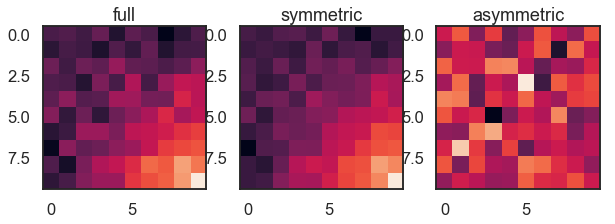

In [2]:
#Symetric decomposition
N = 10
M = np.random.randn(N,N)*10 + np.outer(np.arange(0,N),np.arange(0,N))
AS = 0.5*(M+M.T)
SY = 0.5*(M-M.T)
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.title('full')
plt.imshow(M)
plt.subplot(132)
plt.title('symmetric')
plt.imshow(AS)
plt.subplot(133)
plt.title('asymmetric')
plt.imshow(SY)

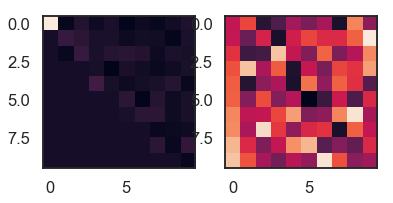

In [3]:
z,t = sp.linalg.schur(M)
plt.subplot(121)
plt.imshow(z)
plt.subplot(122)
plt.imshow(t)

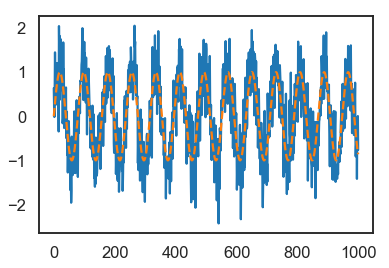

In [76]:
##regression
x1 = np.sin(np.linspace(0,100,1000)/2/np.pi*5)
x2 = x1 + np.random.randn(len(x1))*0.5
plt.plot(x2)
plt.plot(x1,'--')

In [77]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x1[:500][:,None].T, x2[:500][:,None].T)

# Make predictions using the testing set
x2_pred = regr.predict(x1[500:][:,None].T)

In [90]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(x1[:500][:,None].T, x2[:500][:,None].T)
y_pred = model.predict(x1[500:][:,None].T)

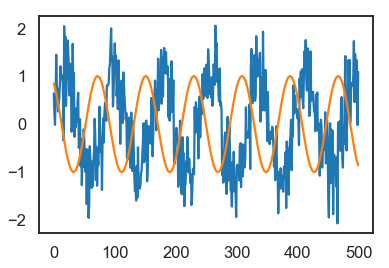

In [88]:
plt.plot(y_pred.T);
plt.plot(x1[500:])

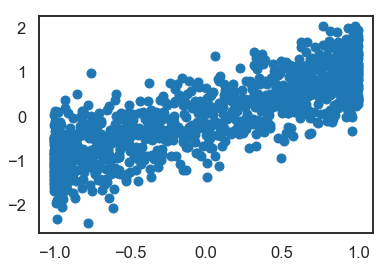

In [78]:
plt.plot(x1,x2,'o')

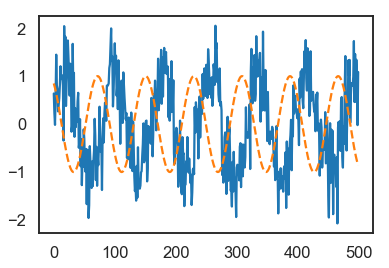

In [80]:
plt.plot(x2_pred.T);
plt.plot(x1[500:],'--')
#plt.plot(np.squeeze(x2_pred)-x2[500:],'r');